<a href="https://colab.research.google.com/github/maryammullenix28/MSDS422/blob/main/Assignment_04_Mullenix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Statements and Load Data

In [ ]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings("ignore")

import graphviz

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Load data

In [ ]:
#Read data into Python
INFILE = "/content/drive/MyDrive/MSDS 422/Assignment 02/HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

In [ ]:
df = pd.read_csv(INFILE)

df.head()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
TARGET_LOSS_AMT,1189.0,13414.576955,10839.455965,224.000000,5639.000000,11003.000000,17634.000000,78987.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000


##Assignment 01

### Explore data types

In [ ]:
dt = df.dtypes

dt

TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object

In [ ]:
objList = []
numList = []
for i in dt.index :
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )

In [ ]:
objList

['REASON', 'JOB']

In [ ]:
numList

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

### Initial analysis of loan default probability and mean amount not repaid

In [ ]:
for i in objList :
    g = df.groupby( i )
    print( g[i].count() )
    x = g[ TARGET_F ].mean()
    print( "Loan Default Prob", x )
    print( " ................. ")
    x = g[ TARGET_A ].mean()
    print( "Amount Unpaid", x )
    print("===============\n")

REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Loan Default Prob REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Amount Unpaid REASON
DebtCon    16005.163758
HomeImp     8388.090909
Name: TARGET_LOSS_AMT, dtype: float64

JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
Loan Default Prob JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Amount Unpaid JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64



### Fill in missing values for categorical variables

In [ ]:
for i in objList :
    print( i )
    print( df[i].unique() )
    g = df.groupby( i )
    print( g[i].count() )
    print( "MOST COMMON = ", df[i].mode()[0] )   
    print( "MISSING = ", df[i].isna().sum() )
    print("")

REASON
['HomeImp' nan 'DebtCon']
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
MOST COMMON =  DebtCon
MISSING =  252

JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
MOST COMMON =  Other
MISSING =  279



In [ ]:
#Fill in missing values
for i in objList :
    #If there's no missing values, skip the variable
    if df[i].isna().sum() == 0 : continue
    print( i , "HAS MISSING") 
    #Create imputed variable
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    print(g[NAME].count())
    print("")
    #Drop the old variable
    df = df.drop( i, axis=1 )

REASON HAS MISSING
IMP_REASON
DebtCon    3928
HomeImp    1780
MISSING     252
Name: IMP_REASON, dtype: int64

JOB HAS MISSING
IMP_JOB
MISSING     279
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: IMP_JOB, dtype: int64



### Visualizing categorical variables
The code uses both imputed variables, as both categories contained missing values.

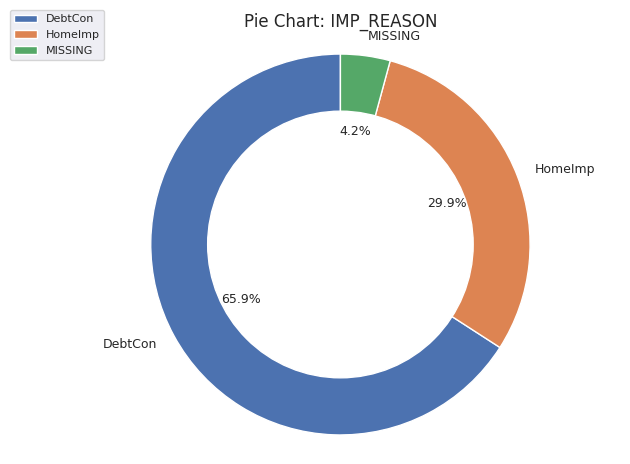

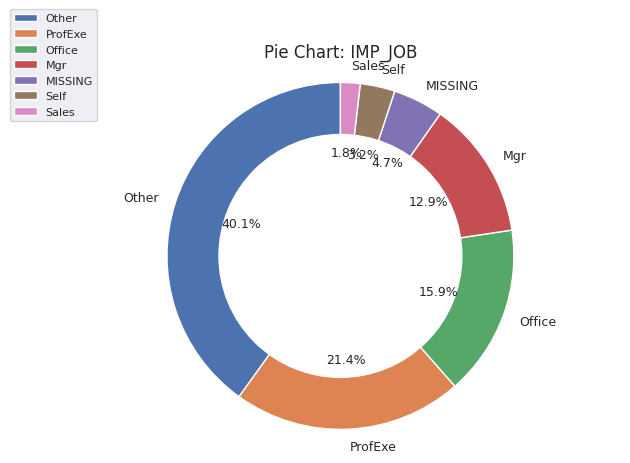

In [ ]:
#Visualizations
for i in objList :
    j = "IMP_" + i
    x = df[ j ].value_counts(dropna=False)
    #print( x )
    theLabels = x.axes[0].tolist()
    #print( theLabels )
    theSlices = list(x)
    #print( theSlices ) 
    
    fig1, ax1 = plt.subplots() 
    ax1.pie(theSlices, 
            labels=theLabels, 
            autopct='%1.1f%%', 
            startangle=90, 
            textprops={'fontsize': 9})
    
    plt.legend(theLabels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.title("Pie Chart: " + j)
    plt.show()

### Visualizing numeric variables

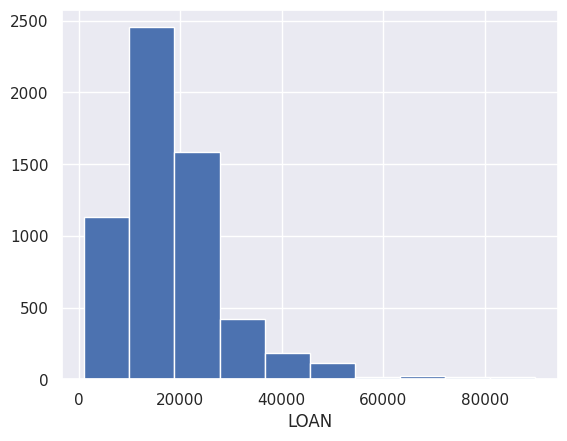

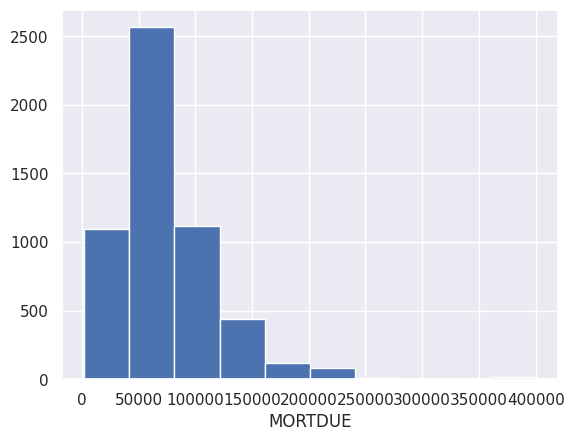

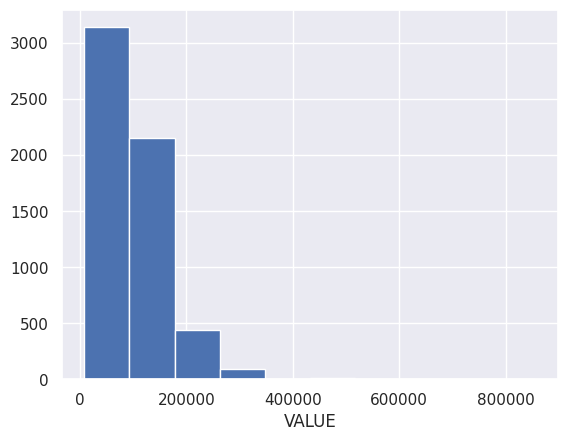

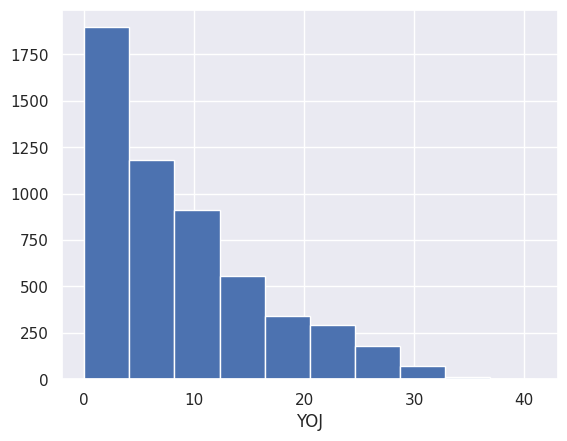

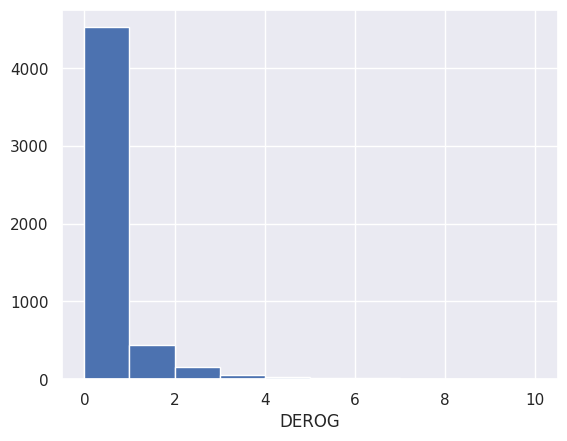

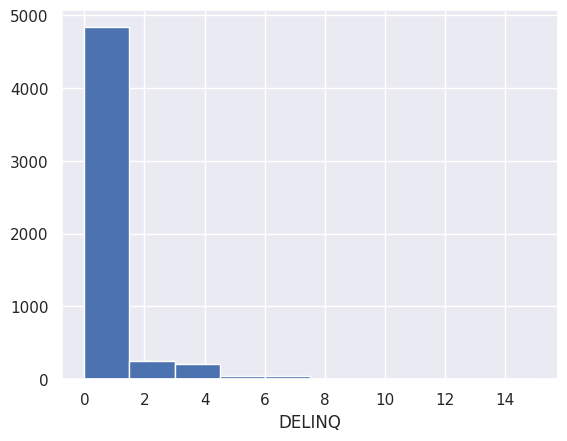

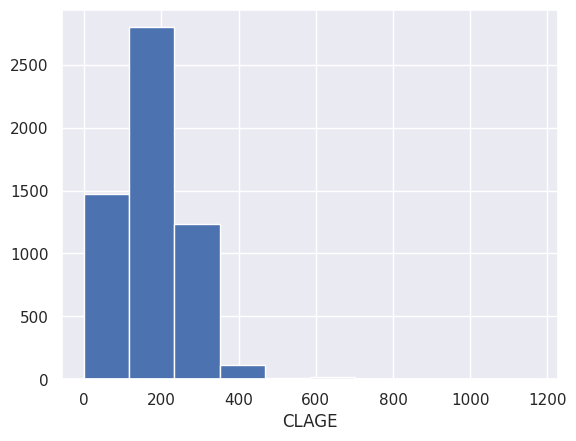

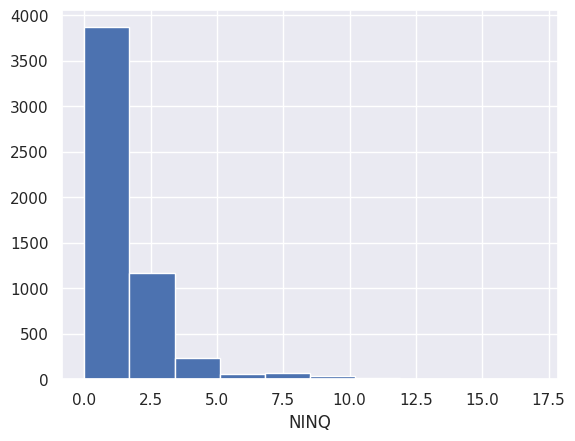

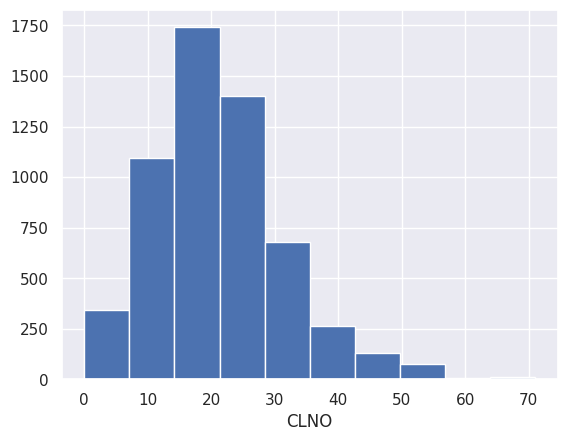

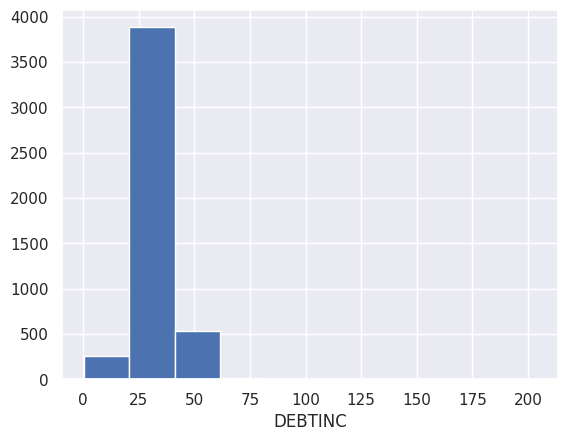

In [ ]:
for i in numList :
    plt.hist( df[ i ] )
    plt.xlabel( i )
    plt.show()

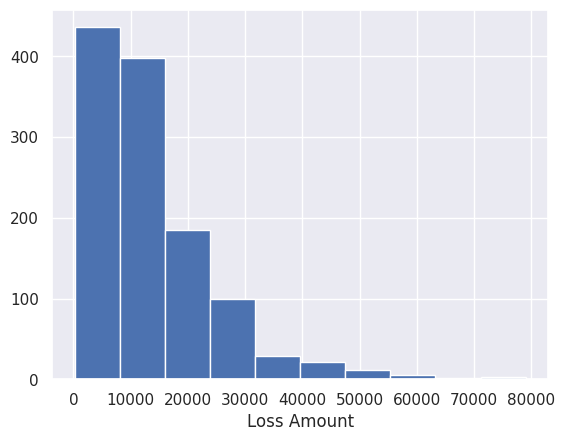

In [ ]:
plt.hist( df[ TARGET_A ] )
plt.xlabel( "Loss Amount" )
plt.show()

### Impute numeric variables

In [ ]:
g = df.groupby("IMP_JOB")
i = "MORTDUE"
print( g[i].median() )

IMP_JOB
MISSING    58936.0
Mgr        76600.0
Office     62970.5
Other      54834.0
ProfExe    82802.5
Sales      71800.0
Self       88465.0
Name: MORTDUE, dtype: float64


In [ ]:
FLAG = "M_" + i
IMP = "IMP_" + i
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 65019.0
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 75142.0
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 64712.0
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 58921.5
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 776
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 70546.0
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Self"]), IMP ] = 84333.0
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)

In [ ]:
for i in numList :
    if df[i].isna().sum() == 0 : continue
    #print(i)
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print( df[i].isna().sum() )
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df[FLAG] = df[FLAG].astype("int32")
    df = df.drop( i, axis=1 )

In [ ]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1,1,1,1,0
TARGET_LOSS_AMT,641.0,1109.0,767.0,1425.0,NaN
LOAN,1100,1300,1500,1500,1700
IMP_REASON,HomeImp,HomeImp,HomeImp,MISSING,HomeImp
IMP_JOB,Other,Other,Other,MISSING,Office
M_MORTDUE,0,0,0,1,0
IMP_MORTDUE,25860.0,70053.0,13500.0,65019.0,97800.0
M_VALUE,0,0,0,1,0
IMP_VALUE,39025.0,68400.0,16700.0,89235.5,112000.0
M_YOJ,0,0,0,1,0


### One Hot Encoding of categorical variables

In [ ]:
for i in objList :
    thePrefix = "z_IMP_" + i
    y = pd.get_dummies( df["IMP_"+i], prefix=thePrefix, drop_first=True )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    df = df.drop( "IMP_" + i, axis=1 )

In [ ]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
M_MORTDUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_MORTDUE,25860.000000,70053.000000,13500.000000,65019.000000,97800.000000
M_VALUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_VALUE,39025.000000,68400.000000,16700.000000,89235.500000,112000.000000
M_YOJ,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_YOJ,10.500000,7.000000,4.000000,7.000000,3.000000
M_DEROG,0.000000,0.000000,0.000000,1.000000,0.000000


##Assignment 02

###Split Data

In [ ]:
dt = df.dtypes
numList = []
for i in dt.index :
    #print(i, dt[i])
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["float64","int64"]) : numList.append( i )

for i in numList :
    #print(" ------- ")
    #print(i)
    theMean = df[i].mean()
    theSD = df[i].std()
    theMax = df[i].max()
    theCutoff = round( theMean + 3*theSD )
    if theMax < theCutoff : continue
    FLAG = "O_" + i
    TRUNC = "TRUNC_" + i
    df[ FLAG ] = ( df[i] > theCutoff )+ 0
    df[ TRUNC ] = df[ i ]
    df.loc[ df[TRUNC] > theCutoff, TRUNC ] = theCutoff
    df = df.drop( i, axis=1 )


df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
M_VALUE,0.000000,0.000000,0.000000,1.000000,0.000000
M_YOJ,0.000000,0.000000,0.000000,1.000000,0.000000
M_DEROG,0.000000,0.000000,0.000000,1.000000,0.000000
M_DELINQ,0.000000,0.000000,0.000000,1.000000,0.000000
M_CLAGE,0.000000,0.000000,0.000000,1.000000,0.000000
M_NINQ,0.000000,0.000000,0.000000,1.000000,0.000000
M_CLNO,0.000000,0.000000,0.000000,1.000000,0.000000
M_DEBTINC,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = df.copy()
X = X.drop(TARGET_F,axis=1)
X = X.drop(TARGET_A,axis=1)

Y = df[[TARGET_F,TARGET_A]]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)

In [ ]:
print( "FLAG DATA" )
print( "TRAINING = ", X_train.shape )
print( "TEST = ", X_test.shape )

FLAG DATA
TRAINING =  (4768, 38)
TEST =  (1192, 38)


In [ ]:
F = ~ Y_train[ TARGET_A ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

In [ ]:
F = ~ Y_test[ TARGET_A ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

In [ ]:
print(Z_train.describe())
print(Z_test.describe())

       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            941.0       941.000000
mean               1.0     13421.645058
std                0.0     10662.481428
min                1.0       224.000000
25%                1.0      5817.000000
50%                1.0     10959.000000
75%                1.0     17635.000000
max                1.0     73946.000000
       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            248.0       248.000000
mean               1.0     13387.758065
std                0.0     11508.703991
min                1.0       320.000000
25%                1.0      5214.500000
50%                1.0     11336.500000
75%                1.0     16734.000000
max                1.0     78987.000000


In [ ]:
#Find outliers
q75_train, q25_train = np.percentile(Z_train[TARGET_A], [75 ,25])
iqr_train = q75_train - q25_train
threshold_train = q75_train + (1.5 * iqr_train)

#q75_test, q25_test = np.percentile(Z_test['TARGET_LOSS_AMT'], [75 ,25])
#iqr_test = q75_test - q25_test
#threshold_test = q75_test + (3 * iqr_test)

In [ ]:
F = Z_train[TARGET_A] > threshold_train
Z_train.loc[F, TARGET_A] = threshold_train

F = Z_test[TARGET_A] > threshold_train
Z_test.loc[F, [TARGET_A]] = threshold_train

#After filtering outliers
print(Z_train.describe())
print(Z_test.describe())

       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            941.0       941.000000
mean               1.0     12934.597237
std                0.0      9126.841589
min                1.0       224.000000
25%                1.0      5817.000000
50%                1.0     10959.000000
75%                1.0     17635.000000
max                1.0     35362.000000
       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            248.0       248.000000
mean               1.0     12672.975806
std                0.0      9045.815117
min                1.0       320.000000
25%                1.0      5214.500000
50%                1.0     11336.500000
75%                1.0     16734.000000
max                1.0     35362.000000


###Simple Decision Tree Model

####Develop a decision tree to predict the probability of default

*   0 = did not default
*   1 = defaulted




In [ ]:
fm01_Tree = tree.DecisionTreeClassifier( max_depth=3 )
fm01_Tree = fm01_Tree.fit( X_train, Y_train[ TARGET_F ] )

In [ ]:
Y_Pred_train = fm01_Tree.predict(X_train)
Y_Pred_test = fm01_Tree.predict(X_test)

In [ ]:
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F],Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F],Y_Pred_test))

Accuracy Train: 0.8873741610738255
Accuracy Test: 0.8825503355704698


In [ ]:
feature_cols = list(X.columns.values)
viz1 = tree.export_graphviz(fm01_Tree,out_file=None,filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"])

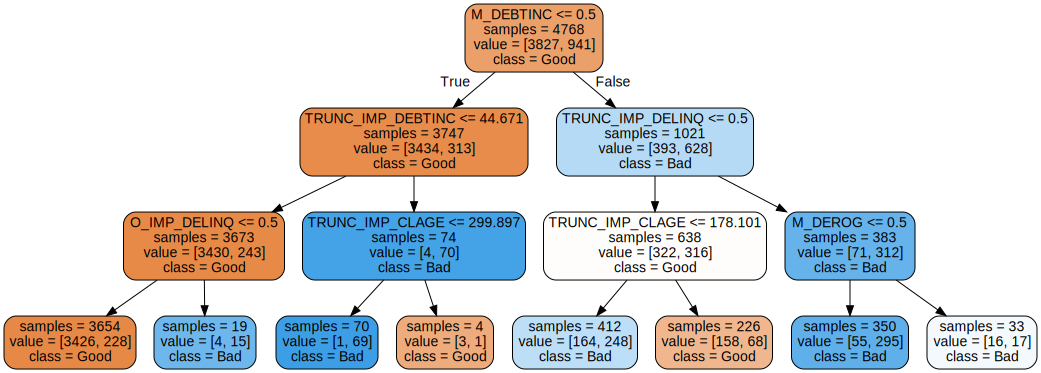

In [ ]:
graph1 = graphviz.Source(viz1)
graph1

In [ ]:
def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

In [ ]:
vars_tree_flag = getTreeVars( fm01_Tree, feature_cols )

for i in vars_tree_flag:
  print(i)

M_DEROG
TRUNC_IMP_DEBTINC
M_DEBTINC
O_IMP_DELINQ
TRUNC_IMP_DELINQ
TRUNC_IMP_CLAGE


####ROC Curve for Decision Tree

In [ ]:
probs1 = fm01_Tree.predict_proba(X_train)
p1 = probs1[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [ ]:
probs2 = fm01_Tree.predict_proba(X_test)
p2 = probs2[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p2)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [ ]:
fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

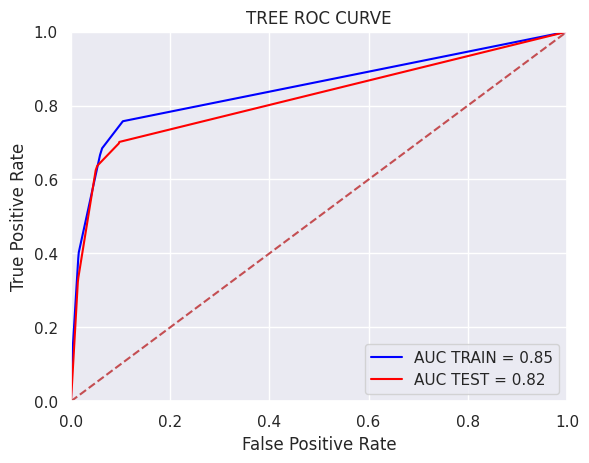

In [ ]:
plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="blue")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="red" )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####Develop a decision tree to predict the loss amount assuming that the loan defaults

In [ ]:
amt_m01_Tree = tree.DecisionTreeRegressor(max_depth=3)
amt_m01_Tree = amt_m01_Tree.fit(W_train, Z_train[TARGET_A])

Z_Pred_train = amt_m01_Tree.predict(W_train)
Z_Pred_test = amt_m01_Tree.predict(W_test)

In [ ]:
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

In [ ]:
print("TREE RMSE Train:", RMSE_TRAIN)
print("TREE RMSE Test:", RMSE_TEST)

TREE RMSE Train: 4456.44388894838
TREE RMSE Test: 4923.333139144427


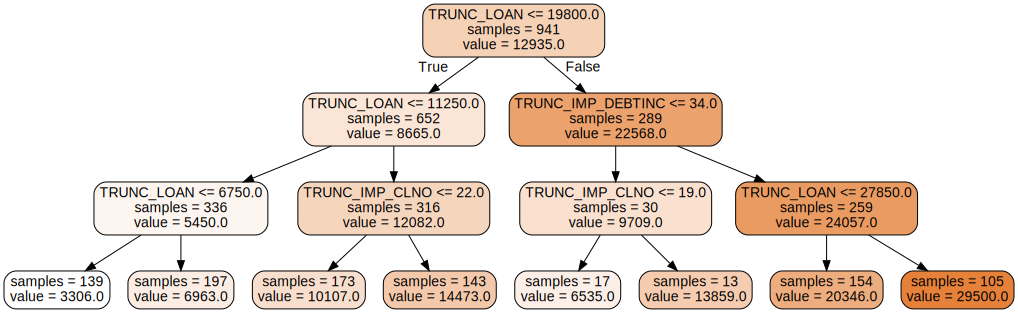

In [ ]:
RMSE_TREE = RMSE_TEST

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( amt_m01_Tree, feature_cols ) 
viz2 = tree.export_graphviz(amt_m01_Tree,out_file=None,filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0)
graph2 = graphviz.Source(viz2)
graph2

###Random Forests

Develop a Random Forest to predict the probability of default


In [ ]:
fm01_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
fm01_RF = fm01_RF.fit(X_train, Y_train[TARGET_F])

Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)

print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))

Accuracy Train: 1.0
Accuracy Test: 0.9144295302013423


ROC Curve for Random Forest model

In [ ]:
def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

('M_DEBTINC', 100)
('TRUNC_IMP_DEBTINC', 75)
('TRUNC_IMP_CLAGE', 46)
('TRUNC_IMP_VALUE', 38)
('TRUNC_LOAN', 38)
('TRUNC_IMP_MORTDUE', 35)
('TRUNC_IMP_CLNO', 34)
('TRUNC_IMP_DELINQ', 34)
('TRUNC_IMP_YOJ', 28)
('TRUNC_IMP_DEROG', 22)
('TRUNC_IMP_NINQ', 19)
('M_VALUE', 15)


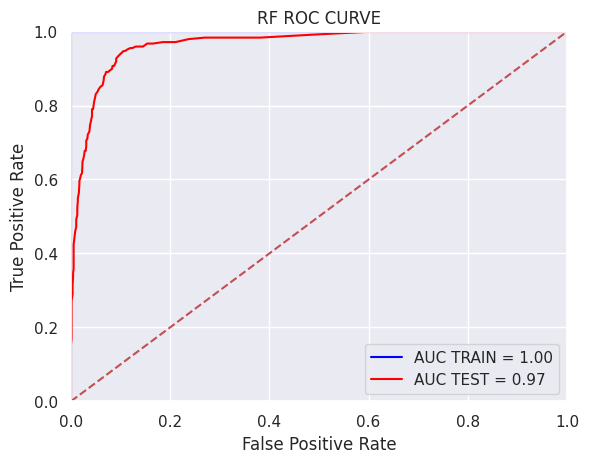

In [ ]:
probs3 = fm01_RF.predict_proba(X_train)
p3 = probs3[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(Y_train[TARGET_F], p3)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs4 = fm01_RF.predict_proba(X_test)
p4 = probs4[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(Y_test[TARGET_F], p4)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars(fm01_RF, feature_cols)

for i in vars_RF_flag :
    print( i )

plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="blue")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Develop a Random Forest to predict the loss amount assuming that the loan defaults


In [ ]:
amt_m01_RF = RandomForestRegressor(n_estimators = 100, random_state=1)
amt_m01_RF = amt_m01_RF.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_RF.predict(W_train)
Z_Pred_test = amt_m01_RF.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("RF RMSE Train:", RMSE_TRAIN )
print("RF RMSE Test:", RMSE_TEST )

RMSE_RF = RMSE_TEST

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( amt_m01_RF, feature_cols )

for i in vars_RF_amt :
    print( i )

RF RMSE Train: 951.3001952357516
RF RMSE Test: 2519.7317820088156
('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 12)
('TRUNC_IMP_DEBTINC', 8)
('M_DEBTINC', 5)
('TRUNC_IMP_CLAGE', 4)


###Gradient Boosting

Develop a Gradient Boosting model to predict the probability of default

In [ ]:
fm01_GB = GradientBoostingClassifier( random_state=1 )
fm01_GB = fm01_GB.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)

print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))

Accuracy Train: 0.9242869127516778
Accuracy Test: 0.9052013422818792


ROC Curve for Gradient Boosting model

('M_DEBTINC', 100)
('TRUNC_IMP_DEBTINC', 29)
('TRUNC_IMP_DELINQ', 16)
('TRUNC_IMP_CLAGE', 14)
('TRUNC_IMP_DEROG', 7)
('M_VALUE', 7)


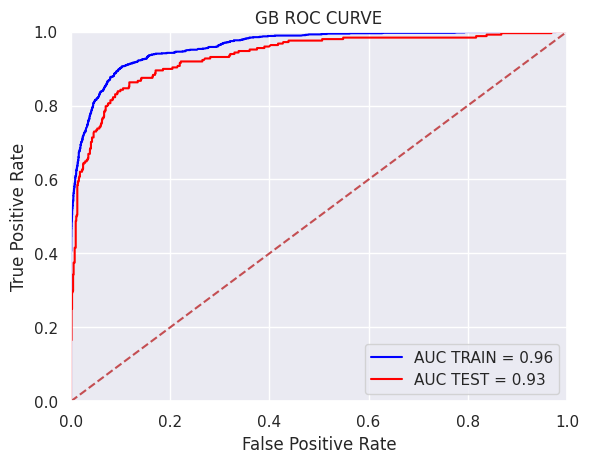

In [ ]:
probs5 = fm01_GB.predict_proba(X_train)
p5 = probs5[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(Y_train[TARGET_F], p5)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs6 = fm01_GB.predict_proba(X_test)
p6 = probs6[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(Y_test[TARGET_F], p6)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( fm01_GB, feature_cols )

for i in vars_GB_flag :
    print(i)

plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="blue")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Develop a Gradient Boosting to predict the loss amount assuming that the loan defaults

In [ ]:
amt_m01_GB = GradientBoostingRegressor(random_state=1)
amt_m01_GB = amt_m01_GB.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_GB.predict(W_train)
Z_Pred_test = amt_m01_GB.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("GB RMSE Train:", RMSE_TRAIN )
print("GB RMSE Test:", RMSE_TEST )

RMSE_GB = RMSE_TEST

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( amt_m01_GB, feature_cols )

for i in vars_GB_amt :
    print(i)

GB RMSE Train: 1156.5558254201617
GB RMSE Test: 1999.8990244332608
('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 15)
('TRUNC_IMP_DEBTINC', 7)
('M_DEBTINC', 6)
('TRUNC_IMP_CLAGE', 4)


###ROC Curves

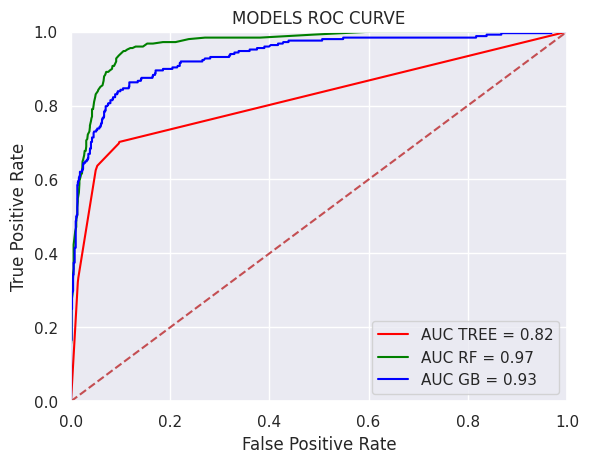

Root Mean Square Average For Damages
TREE 4923.333139144427
RF 2519.7317820088156
GB 1999.8990244332608


In [ ]:
plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, label = 'AUC TREE = %0.2f' % auc_tree, color="red")
plt.plot(fpr_RF, tpr_RF, label = 'AUC RF = %0.2f' % auc_RF, color="green")
plt.plot(fpr_GB, tpr_GB, label = 'AUC GB = %0.2f' % auc_GB, color="blue")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Root Mean Square Average For Damages")
print("TREE", RMSE_TREE)
print("RF", RMSE_RF)
print("GB", RMSE_GB)

##Assignment 03

###Functions

In [ ]:
def getProbAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    probs = MODEL.predict_proba( X )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

def print_ROC_Curve( TITLE, LIST ) :
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )

def getAmtAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    MEAN = Y.mean()
    RMSE = math.sqrt( metrics.mean_squared_error( Y, pred))
    return [NAME, RMSE, MEAN]

def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

def getCoefLogit( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nDEFAULT")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )



def getCoefLinear( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_
    for coef, feat in zip(MODEL.coef_,varNames):
        coef_dict[feat] = coef
    print("\nLOSS AMOUNT")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )

###Models

####Decision Tree

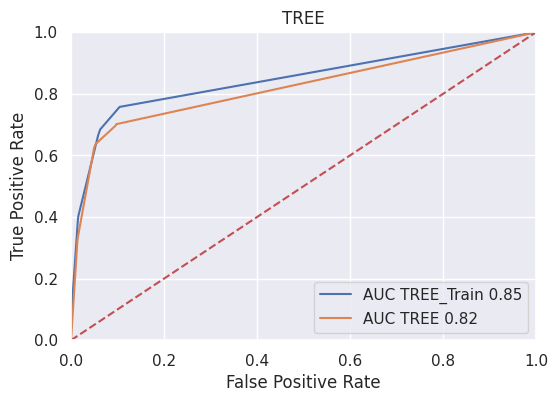

TREE CLASSIFICATION ACCURACY
TREE_Train  =  0.8873741610738255
TREE  =  0.8825503355704698
------




In [ ]:
WHO = "TREE"

CLM = tree.DecisionTreeClassifier( max_depth=3 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

feature_cols = list( X.columns.values )
viz1 = tree.export_graphviz(CLM,out_file=None,filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )
graph1 = graphviz.Source(viz1)
vars_tree_flag = getTreeVars( CLM, feature_cols )

In [ ]:
AMT = tree.DecisionTreeRegressor( max_depth= 4 )
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( AMT, feature_cols ) 
viz1 = tree.export_graphviz(AMT,out_file=None,filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )
graph1 = graphviz.Source(viz1)

TREE_CLM = TEST_CLM.copy()
TREE_AMT = TEST_AMT.copy()

TREE RMSE ACCURACY
TREE_Train  =  3770.6915034463223
TREE  =  5099.125643908835
------




####Random Forests

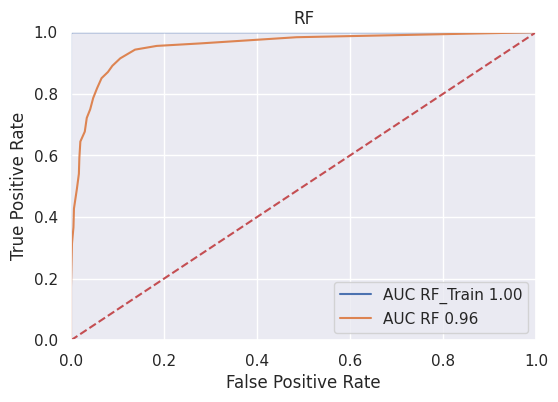

RF CLASSIFICATION ACCURACY
RF_Train  =  0.9993708053691275
RF  =  0.9093959731543624
------




In [ ]:
def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

WHO = "RF"

CLM = RandomForestClassifier( n_estimators = 25, random_state=1 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( CLM, feature_cols )

In [ ]:
AMT = RandomForestRegressor(n_estimators = 100, random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( AMT, feature_cols )

##for i in vars_RF_amt :
##    print( i )

RF_CLM = TEST_CLM.copy()
RF_AMT = TEST_AMT.copy()

RF RMSE ACCURACY
RF_Train  =  951.3001952357516
RF  =  2519.7317820088156
------




####Gradient Boosting

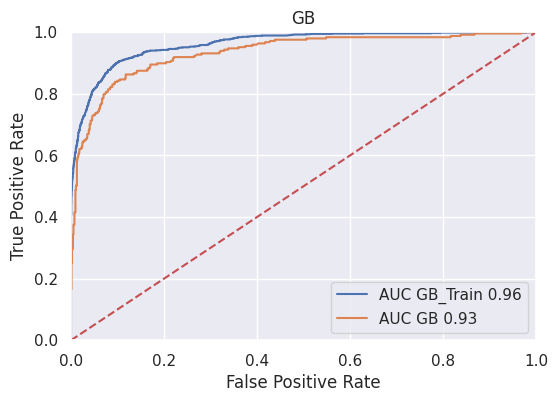

GB CLASSIFICATION ACCURACY
GB_Train  =  0.9242869127516778
GB  =  0.9052013422818792
------




In [ ]:
WHO = "GB"

CLM = GradientBoostingClassifier( random_state=1 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( CLM, feature_cols )

In [ ]:
AMT = GradientBoostingRegressor(random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( AMT, feature_cols )

##for i in vars_GB_amt :
##    print( i )

GB_CLM = TEST_CLM.copy()
GB_AMT = TEST_AMT.copy()

GB RMSE ACCURACY
GB_Train  =  1156.5558254201617
GB  =  1999.8990244332608
------




###Regression


####Develop a logistic regression model to determine the probability of a loan default. Use all of the variables.

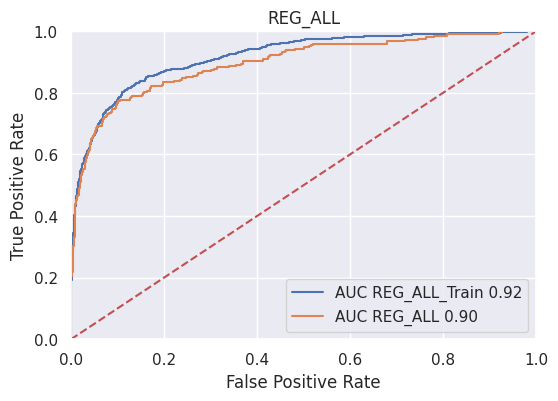

REG_ALL CLASSIFICATION ACCURACY
REG_ALL_Train  =  0.8930369127516778
REG_ALL  =  0.886744966442953
------




In [ ]:
WHO = "REG_ALL"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

####Develop a linear regression model to determine the expected loss if the loan defaults. Use all of the variables.

In [ ]:
AMT = LinearRegression()
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

#REG_ALL_CLM_COEF = getCoefLogit( CLM, X_train )
#REG_ALL_AMT_COEF = getCoefLinear( AMT, X_train )

REG_ALL_CLM = TEST_CLM.copy()
REG_ALL_AMT = TEST_AMT.copy()

REG_ALL RMSE ACCURACY
REG_ALL_Train  =  2951.969733896921
REG_ALL  =  2921.355214881876
------




####Develop a logistic regression model to determine the probability of a loan default. Use the variables that were selected by a DECISION TREE.

In [ ]:
for i in vars_tree_flag:
  print(i)

M_DEROG
TRUNC_IMP_DEBTINC
M_DEBTINC
O_IMP_DELINQ
TRUNC_IMP_DELINQ
TRUNC_IMP_CLAGE


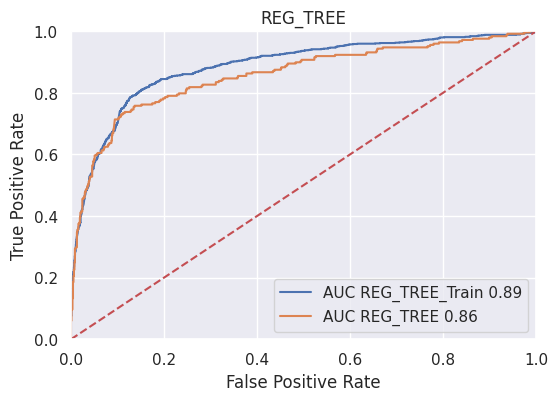

REG_TREE CLASSIFICATION ACCURACY
REG_TREE_Train  =  0.8739513422818792
REG_TREE  =  0.8733221476510067
------




In [ ]:
WHO = "REG_TREE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[vars_tree_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[vars_tree_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[vars_tree_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

####Develop a linear regression model to determine the expected loss if the loan defaults. Use the variables that were selected by a DECISION TREE.

In [ ]:
AMT = LinearRegression()
AMT = AMT.fit( W_train[vars_tree_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[vars_tree_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[vars_tree_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

#REG_TREE_CLM_COEF = getCoefLogit( CLM, X_train[vars_tree_flag] )
#REG_TREE_AMT_COEF = getCoefLinear( AMT, X_train[vars_tree_amt] )

REG_TREE_CLM = TEST_CLM.copy()
REG_TREE_AMT = TEST_AMT.copy()

REG_TREE RMSE ACCURACY
REG_TREE_Train  =  3339.6031191321185
REG_TREE  =  3362.6772108815076
------




####Develop a logistic regression model to determine the probability of a loan default. Use the variables that were selected by a RANDOM FOREST.

In [ ]:
for i in vars_RF_flag:
  print(i[0])

M_DEBTINC
TRUNC_IMP_DEBTINC
TRUNC_IMP_CLAGE
TRUNC_IMP_DELINQ
TRUNC_LOAN
TRUNC_IMP_VALUE
TRUNC_IMP_MORTDUE
TRUNC_IMP_CLNO
TRUNC_IMP_YOJ
TRUNC_IMP_DEROG
TRUNC_IMP_NINQ


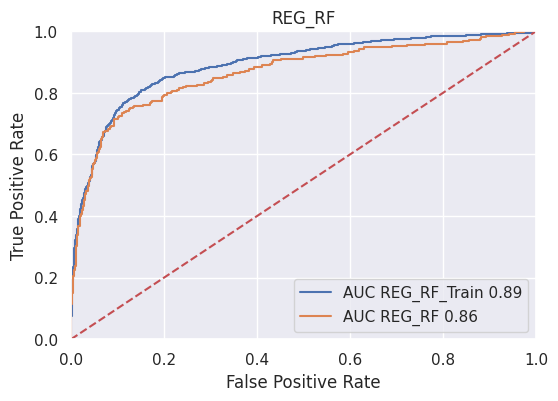

REG_RF CLASSIFICATION ACCURACY
REG_RF_Train  =  0.8756291946308725
REG_RF  =  0.8682885906040269
------




In [ ]:
WHO = "REG_RF"


#print("\n\n")
RF_flag = []
for i in vars_RF_flag :
    #print(i)
    theVar = i[0]
    RF_flag.append( theVar )

#print("\n\n")
RF_amt = []
for i in vars_RF_amt :
    #print(i)
    theVar = i[0]
    RF_amt.append( theVar )


CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[RF_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[RF_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[RF_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

####Develop a linear regression model to determine the expected loss if the loan defaults. Use the variables that were selected by a RANDOM FOREST.

In [ ]:
AMT = LinearRegression()
AMT = AMT.fit( W_train[RF_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[RF_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[RF_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


REG_RF_CLM_COEF = getCoefLogit( CLM, X_train[RF_flag] )
REG_RF_AMT_COEF = getCoefLinear( AMT, X_train[RF_amt] )

REG_RF_CLM = TEST_CLM.copy()
REG_RF_AMT = TEST_AMT.copy()

REG_RF RMSE ACCURACY
REG_RF_Train  =  3589.0656817988765
REG_RF  =  3528.99988977264
------



DEFAULT
---------
Total Variables:  12
INTERCEPT  =  -5.023457970365041
M_DEBTINC  =  2.736156136501766
TRUNC_IMP_DEBTINC  =  0.09722913043633266
TRUNC_IMP_CLAGE  =  -0.005891392275810573
TRUNC_IMP_DELINQ  =  0.7324544179521483
TRUNC_LOAN  =  -2.273824514183098e-06
TRUNC_IMP_VALUE  =  6.671731885975646e-07
TRUNC_IMP_MORTDUE  =  -2.670901629004243e-07
TRUNC_IMP_CLNO  =  -0.019419643681942784
TRUNC_IMP_YOJ  =  -0.010140973908126119
TRUNC_IMP_DEROG  =  0.7196528901392031
TRUNC_IMP_NINQ  =  0.12304648347370771

LOSS AMOUNT
---------
Total Variables:  6
INTERCEPT  =  -10670.414159149472
TRUNC_LOAN  =  0.6638938957214487
TRUNC_IMP_CLNO  =  283.4344196020361
TRUNC_IMP_DEBTINC  =  179.14894519333248
M_DEBTINC  =  5247.80249475817
TRUNC_IMP_CLAGE  =  -22.671424120219086


####Develop a logistic regression model to determine the probability of a loan default. Use the variables that were selected by a GRADIENT BOOSTING model.

In [ ]:
for i in vars_GB_flag:
  print(i)

('M_DEBTINC', 100)
('TRUNC_IMP_DEBTINC', 29)
('TRUNC_IMP_DELINQ', 16)
('TRUNC_IMP_CLAGE', 14)
('TRUNC_IMP_DEROG', 7)
('M_VALUE', 7)


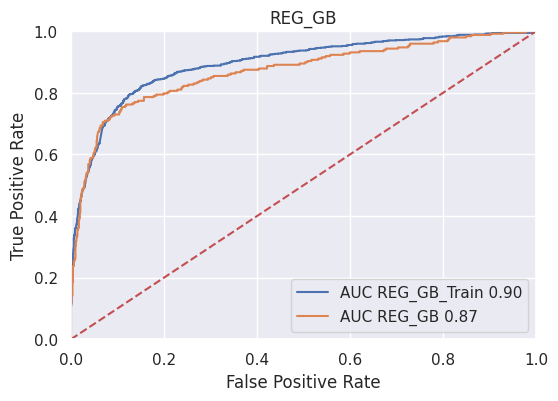

REG_GB CLASSIFICATION ACCURACY
REG_GB_Train  =  0.881501677852349
REG_GB  =  0.8800335570469798
------




In [ ]:
WHO = "REG_GB"


#print("\n\n")
GB_flag = []
for i in vars_GB_flag :
    #print(i)
    theVar = i[0]
    GB_flag.append( theVar )

#print("\n\n")
GB_amt = []
for i in vars_GB_amt :
    #print(i)
    theVar = i[0]
    GB_amt.append( theVar )


CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[GB_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[GB_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[GB_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

####Develop a linear regression model to determine the expected loss if the loan defaults. Use the variables that were selected by a GRADIENT BOOSTING model.

In [ ]:
AMT = LinearRegression()
AMT = AMT.fit( W_train[GB_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_GB_CLM_COEF = getCoefLogit( CLM, X_train[GB_flag] )
REG_GB_AMT_COEF = getCoefLinear( AMT, X_train[GB_amt] )

REG_GB_CLM = TEST_CLM.copy()
REG_GB_AMT = TEST_AMT.copy()

REG_GB RMSE ACCURACY
REG_GB_Train  =  3589.0656817988765
REG_GB  =  3528.99988977264
------



DEFAULT
---------
Total Variables:  7
INTERCEPT  =  -5.459346895943381
M_DEBTINC  =  2.7417850525783485
TRUNC_IMP_DEBTINC  =  0.10355272836724665
TRUNC_IMP_DELINQ  =  0.6771424927512885
TRUNC_IMP_CLAGE  =  -0.006905703754931071
TRUNC_IMP_DEROG  =  0.7499394442284677
M_VALUE  =  3.5351803173633103

LOSS AMOUNT
---------
Total Variables:  6
INTERCEPT  =  -10670.414159149472
TRUNC_LOAN  =  0.6638938957214487
TRUNC_IMP_CLNO  =  283.4344196020361
TRUNC_IMP_DEBTINC  =  179.14894519333248
M_DEBTINC  =  5247.80249475817
TRUNC_IMP_CLAGE  =  -22.671424120219086


####Develop a logistic regression model to determine the probability of a loan default. Use the variables that were selected by STEPWISE SELECTION.


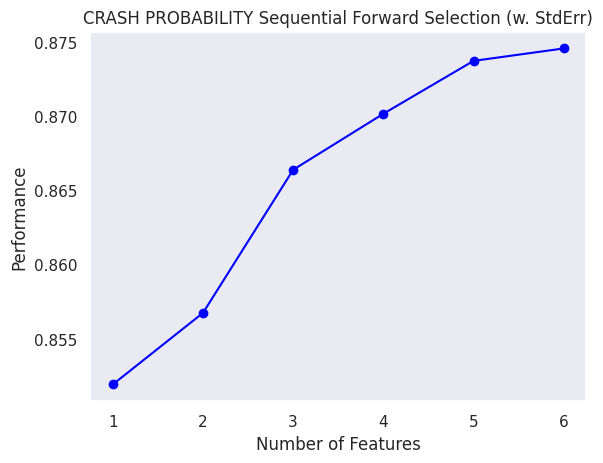

 ................... 
argmax
feature_names    (0, 1, 2, 3, 4, 5)
avg_score                  0.874581
Name: 6, dtype: object
 ................... 
('0', '1', '2', '3', '4', '5')
M_DEROG
TRUNC_IMP_DEBTINC
M_DEBTINC
O_IMP_DELINQ
TRUNC_IMP_DELINQ
TRUNC_IMP_CLAGE


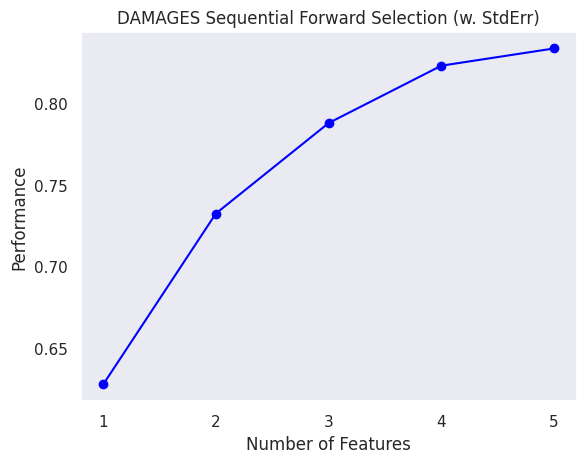

 ................... 
argmax
feature_names    (0, 1, 2, 3, 4)
avg_score               0.833434
Name: 5, dtype: object
 ................... 
('0', '1', '2', '3', '4')
TRUNC_LOAN
TRUNC_IMP_CLNO
TRUNC_IMP_DEBTINC
M_DEBTINC
TRUNC_IMP_CLAGE


In [ ]:
U_train = X_train[ vars_tree_flag ]
stepVarNames = list( U_train.columns.values )
maxCols = U_train.shape[1]

sfs = SFS( LogisticRegression( solver='newton-cg', max_iter=100 ),
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           cv=3
           )
sfs.fit(U_train.values, Y_train[ TARGET_F ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('CRASH PROBABILITY Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

U_train = X_train[ finalStepVars ]
U_test = X_test[ finalStepVars ]



V_train = W_train[ GB_amt ]
stepVarNames = list( V_train.columns.values )
maxCols = V_train.shape[1]

sfs = SFS( LinearRegression(),
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           scoring = 'r2',
           cv=5
           )
sfs.fit(V_train.values, Z_train[ TARGET_A ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('DAMAGES Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

V_train = W_train[ finalStepVars ]
V_test = W_test[ finalStepVars ]

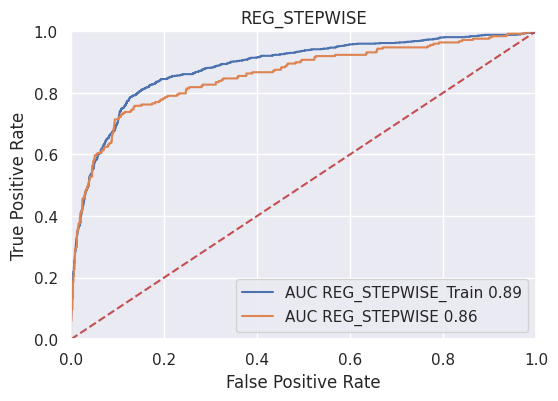

REG_STEPWISE CLASSIFICATION ACCURACY
REG_STEPWISE_Train  =  0.8739513422818792
REG_STEPWISE  =  0.8733221476510067
------




In [ ]:
WHO = "REG_STEPWISE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( U_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

####Develop a linear regression model to determine the expected loss if the loan defaults. Use the variables that were selected by STEPWISE SELECTION.

In [ ]:
AMT = LinearRegression()
AMT = AMT.fit( V_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_STEP_CLM_COEF = getCoefLogit( CLM, U_train )
REG_STEP_AMT_COEF = getCoefLinear( AMT, V_train )

REG_STEP_CLM = TEST_CLM.copy()
REG_STEP_AMT = TEST_AMT.copy()

REG_STEPWISE RMSE ACCURACY
REG_STEPWISE_Train  =  3589.0656817988765
REG_STEPWISE  =  3528.99988977264
------



DEFAULT
---------
Total Variables:  7
INTERCEPT  =  -5.062671298904341
M_DEROG  =  -0.8394951447452784
TRUNC_IMP_DEBTINC  =  0.10147223795680099
M_DEBTINC  =  2.8264139153557553
O_IMP_DELINQ  =  2.1247584166506464
TRUNC_IMP_DELINQ  =  0.7006729259299364
TRUNC_IMP_CLAGE  =  -0.007172175695375264

LOSS AMOUNT
---------
Total Variables:  6
INTERCEPT  =  -10670.414159149472
TRUNC_LOAN  =  0.6638938957214487
TRUNC_IMP_CLNO  =  283.4344196020361
TRUNC_IMP_DEBTINC  =  179.14894519333248
M_DEBTINC  =  5247.80249475817
TRUNC_IMP_CLAGE  =  -22.671424120219086


###All CLM

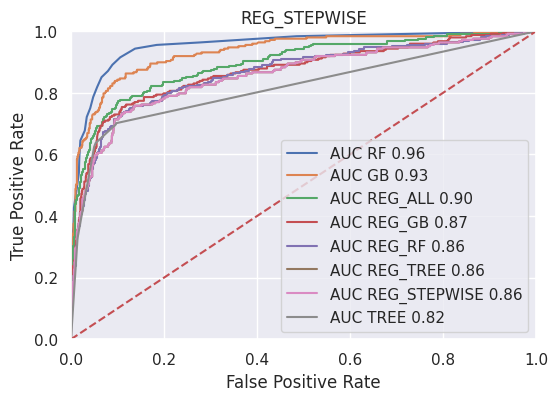

ALL CLASSIFICATION ACCURACY
RF  =  0.9093959731543624
GB  =  0.9052013422818792
REG_ALL  =  0.886744966442953
TREE  =  0.8825503355704698
REG_GB  =  0.8800335570469798
REG_TREE  =  0.8733221476510067
REG_STEPWISE  =  0.8733221476510067
REG_RF  =  0.8682885906040269
------


ALL DAMAGE MODEL ACCURACY
GB  =  1999.8990244332608
RF  =  2519.7317820088156
REG_ALL  =  2921.355214881876
REG_TREE  =  3362.6772108815076
REG_RF  =  3528.99988977264
REG_GB  =  3528.99988977264
REG_STEPWISE  =  3528.99988977264
TREE  =  5099.125643908835
------




In [ ]:
ALL_CLM = [ TREE_CLM, RF_CLM, GB_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, REG_STEP_CLM ]

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL CLASSIFICATION ACCURACY", ALL_CLM )


ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, REG_STEP_AMT ]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL DAMAGE MODEL ACCURACY", ALL_AMT )

##Assignment 04

####Functions

In [ ]:
def get_TF_ProbAccuracyScores( NAME, MODEL, X, Y ) :
    probs = MODEL.predict( X )
    pred_list = []
    for p in probs :
        pred_list.append( np.argmax( p ) )
    pred = np.array( pred_list )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

####Scale Data

In [ ]:
#Scale between 0 and 1
theScaler = MinMaxScaler()
theScaler.fit( X_train )

MinMaxScaler()

In [ ]:
WHO = "Tensor_Flow"

#Scale data
U_train = theScaler.transform( X_train )
U_test = theScaler.transform( X_test )

#Convert to dataframes
U_train = pd.DataFrame( U_train )
U_test = pd.DataFrame( U_test )

#Add column names using X's columns
U_train.columns = list( X_train.columns.values )
U_test.columns = list( X_train.columns.values )

V_train = theScaler.transform( W_train )
V_test = theScaler.transform( W_test )

V_train = pd.DataFrame( V_train )
V_test = pd.DataFrame( V_test )

V_train.columns = list( W_train.columns.values )
V_test.columns = list( W_train.columns.values )

####Variable Selection

In [ ]:
#Variable Selection - Could be a superset
U_train = U_train[ GB_flag ]
U_test = U_test[ GB_flag ]

V_train = V_train[ GB_amt ]
V_test = V_test[ GB_amt ]

####Loan Default (Yes or No)

38/38 [==============================] - 0s 2ms/step


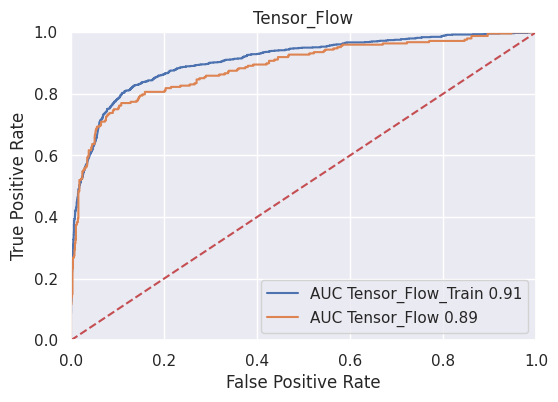

Tensor_Flow CLASSIFICATION ACCURACY
Tensor_Flow_Train  =  0.8877936241610739
Tensor_Flow  =  0.886744966442953
------




In [ ]:
F_theShapeSize = U_train.shape[1]
F_theActivation = tf.keras.activations.relu
F_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
F_theOptimizer = tf.keras.optimizers.Adam()
F_theEpochs = 100

#Number of nodes in layer
F_theUnits = int( 2*F_theShapeSize )

F_LAYER_01 = tf.keras.layers.Dense( units=F_theUnits, activation=F_theActivation, input_dim=F_theShapeSize )
F_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
F_LAYER_02 = tf.keras.layers.Dense( units=F_theUnits, activation=F_theActivation )
F_LAYER_OUTPUT = tf.keras.layers.Dense( units=2, activation=tf.keras.activations.softmax )

CLM = tf.keras.Sequential()
CLM.add( F_LAYER_01 )
CLM.add( F_LAYER_DROP )
CLM.add( F_LAYER_02 )
CLM.add( F_LAYER_OUTPUT )
CLM.compile( loss=F_theLossMetric, optimizer=F_theOptimizer)
CLM.fit( U_train, Y_train[TARGET_F], epochs=F_theEpochs, verbose=False )

TRAIN_CLM = get_TF_ProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_F ] )
TEST_CLM = get_TF_ProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

####Amount Loss

In [ ]:
A_theShapeSize = V_train.shape[1]
A_theActivation = tf.keras.activations.relu
A_theLossMetric = tf.keras.losses.MeanSquaredError()
A_theOptimizer = tf.keras.optimizers.Adam()
A_theEpochs = 100

A_theUnits = int( 2*A_theShapeSize )

A_LAYER_01 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation, input_dim=A_theShapeSize )
A_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
A_LAYER_02 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation )
A_LAYER_OUTPUT = tf.keras.layers.Dense( units=1, activation=tf.keras.activations.linear )

AMT = tf.keras.Sequential()
AMT.add( A_LAYER_01 )
AMT.add( A_LAYER_DROP )
AMT.add( A_LAYER_02 )
AMT.add( A_LAYER_OUTPUT )
AMT.compile( loss=A_theLossMetric, optimizer=A_theOptimizer)
AMT.fit( V_train, Z_train[TARGET_A], epochs=A_theEpochs, verbose=False )


TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

TF_CLM = TEST_CLM.copy()
TF_AMT = TEST_AMT.copy()

8/8 [==============================] - 0s 3ms/step
Tensor_Flow RMSE ACCURACY
Tensor_Flow_Train  =  7839.151194557568
Tensor_Flow  =  7756.25925085384
------




####All CLM

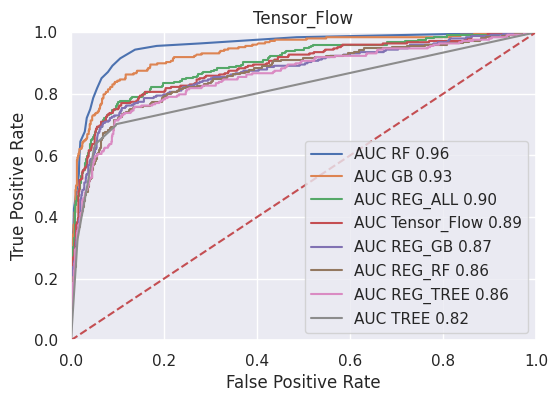

ALL CLASSIFICATION ACCURACY
RF  =  0.9093959731543624
GB  =  0.9052013422818792
REG_ALL  =  0.886744966442953
Tensor_Flow  =  0.886744966442953
TREE  =  0.8825503355704698
REG_GB  =  0.8800335570469798
REG_TREE  =  0.8733221476510067
REG_RF  =  0.8682885906040269
------


ALL LOSS MODEL ACCURACY
GB  =  1999.8990244332608
RF  =  2519.7317820088156
REG_ALL  =  2921.355214881876
REG_TREE  =  3362.6772108815076
REG_RF  =  3528.99988977264
REG_GB  =  3528.99988977264
TREE  =  5099.125643908835
Tensor_Flow  =  7756.25925085384
------




In [ ]:
ALL_CLM = [ TREE_CLM, RF_CLM, GB_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, TF_CLM ]

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL CLASSIFICATION ACCURACY", ALL_CLM )



ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, TF_AMT ]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL LOSS MODEL ACCURACY", ALL_AMT )